<h1> Statistical Analysis </h1>

In [1]:
import os
from selective_encryption import encrypt
import oqs

def encrypt_files_in_folder(folder_path, sha_key_str, buffer_size, shared_secret):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        if os.path.isfile(file_path):
            print(f"Encrypting file: {file_path}")
            encrypt(file_path=file_path, 
                    sha_key_str=sha_key_str, 
                    buffer=buffer_size, 
                    aes_key=shared_secret, 
                    save_data=True)
            
            
folder_path = 'images/k_dataset/'
buffer_size = 640
sha_key_str = 'Tuesday Evening'
kem = "ML-KEM-1024"

alice = oqs.KeyEncapsulation(kem)
public_key_alice = alice.generate_keypair()
bob = oqs.KeyEncapsulation(kem)
cipher_text_bob, shared_secret = bob.encap_secret(public_key_alice)

encrypt_files_in_folder(folder_path, sha_key_str, buffer_size, shared_secret)


Encrypting file: images/k_dataset/DJI_0031-h30.JPG
itr_count: 0
_get_2d_array: 0.000011416
dwt2d: 1.064043583
dwt2d: 0.815499500
sha256_with_key: 0.000126834
sha512_with_key: 0.000059333
xor_with_sha_key_numba: 0.084544167
xor_with_sha_key: 0.084566083
xor_with_sha_key_numba: 0.000233709
xor_with_sha_key: 0.000246208
aes_encrypt: 0.000778416
_se_encrypt: 1.965681708
itr_count: 1
_get_2d_array: 0.000011208
dwt2d: 0.000644500
dwt2d: 0.000404417
sha256_with_key: 0.000017792
sha512_with_key: 0.000047417
xor_with_sha_key_numba: 0.000062875
xor_with_sha_key: 0.000070333
xor_with_sha_key_numba: 0.000246291
xor_with_sha_key: 0.000254834
aes_encrypt: 0.000115875
_se_encrypt: 0.001785625
itr_count: 2
_get_2d_array: 0.000002709
dwt2d: 0.000630375
dwt2d: 0.000401875
sha256_with_key: 0.000012375
sha512_with_key: 0.000047167
xor_with_sha_key_numba: 0.000059625
xor_with_sha_key: 0.000067041
xor_with_sha_key_numba: 0.000246000
xor_with_sha_key: 0.000255666
aes_encrypt: 0.000107833
_se_encrypt: 0.00171

In [2]:
import os
import numpy as np
from scipy.stats import pearsonr
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

def get_stats(original_folder, encrypted_folder):
    correlations = []
    psnr_values = []
    ssim_values = []

    for filename in os.listdir(original_folder):
        original_file_path = os.path.join(original_folder, filename)
        if(os.path.isfile(original_file_path)):
            encrypted_file_path = os.path.join(encrypted_folder, f'{filename}_PF.npy')
            
            if os.path.isfile(encrypted_file_path):
                with open(original_file_path, 'rb') as original_file, open(encrypted_file_path, 'rb') as encrypted_file:
                    original_byte_values = np.frombuffer(original_file.read(), dtype=np.uint8)
                    encrypted_byte_values = np.frombuffer(encrypted_file.read(), dtype=np.uint8)

                    max_length = max(len(original_byte_values), len(encrypted_byte_values))
                    original_byte_values_padded = np.pad(original_byte_values, (0, max_length - len(original_byte_values)), 'constant')
                    encrypted_byte_values_padded = np.pad(encrypted_byte_values, (0, max_length - len(encrypted_byte_values)), 'constant')

                    correlation, _ = pearsonr(original_byte_values_padded, encrypted_byte_values_padded)
                    correlations.append(correlation)

                    psnr_value = psnr(original_byte_values_padded, encrypted_byte_values_padded, data_range=255)
                    psnr_values.append(psnr_value)

                    ssim_value = ssim(original_byte_values_padded, encrypted_byte_values_padded, data_range=255)
                    ssim_values.append(ssim_value)
            else:
                print(f"Encrypted file for {filename} not found.")

    correlations = np.array(correlations)
    min_corr = np.min(correlations)
    mean_corr = np.mean(correlations)
    max_corr = np.max(correlations)
    std_corr = np.std(correlations)

    psnr_values = np.array(psnr_values)
    psnr_min = np.min(psnr_values)
    psnr_mean = np.mean(psnr_values)
    psnr_max = np.max(psnr_values)
    psnr_std = np.std(psnr_values)

    ssim_values = np.array(ssim_values)
    ssim_min = np.min(ssim_values)
    ssim_mean = np.mean(ssim_values)
    ssim_max = np.max(ssim_values)
    ssim_std = np.std(ssim_values)

    return min_corr, mean_corr, max_corr, std_corr, psnr_min, psnr_mean, psnr_max, psnr_std, ssim_min, ssim_mean, ssim_max, ssim_std

original_folder = 'images/k_dataset'
encrypted_folder = 'images/k_dataset/enc'

min_corr, mean_corr, max_corr, std_corr, psnr_min, psnr_mean, psnr_max, psnr_std, ssim_min, ssim_mean, ssim_max, ssim_std = get_stats(original_folder, encrypted_folder)

print(f"Min Pearson correlation: {min_corr}")
print(f"Mean Pearson correlation: {mean_corr}")
print(f"Max Pearson correlation: {max_corr}")
print(f"Standard Deviation of Pearson correlations: {std_corr}")

print('\n')

print(f"PSNR Min: {psnr_min}")
print(f"PSNR Mean: {psnr_mean}")
print(f"PSNR Max: {psnr_max}")
print(f"PSNR Std: {psnr_std}")

print('\n')

print(f"SSIM Min: {ssim_min}")
print(f"SSIM Mean: {ssim_mean}")
print(f"SSIM Max: {ssim_max}")
print(f"SSIM Std: {ssim_std}")


Min Pearson correlation: -0.025880427642502295
Mean Pearson correlation: -0.012837175520780425
Max Pearson correlation: -0.004783513494546757
Standard Deviation of Pearson correlations: 0.003009069184040079


PSNR Min: 4.612045857586315
PSNR Mean: 4.720107376113338
PSNR Max: 4.995733045207265
PSNR Std: 0.05585460576483102


SSIM Min: -0.001097167459928993
SSIM Mean: 0.0003527200072576155
SSIM Max: 0.0005071228759064392
SSIM Std: 0.00018917244431281862


<h1> Uniformity Analysis</b>

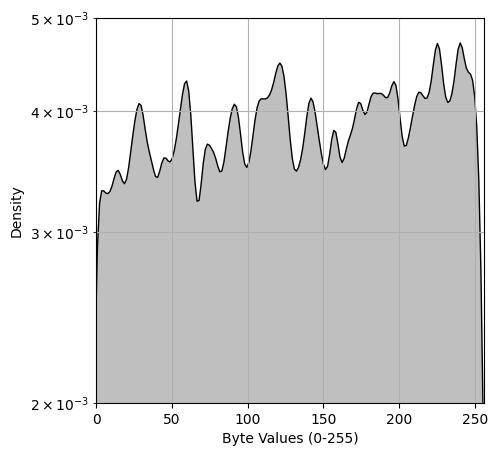

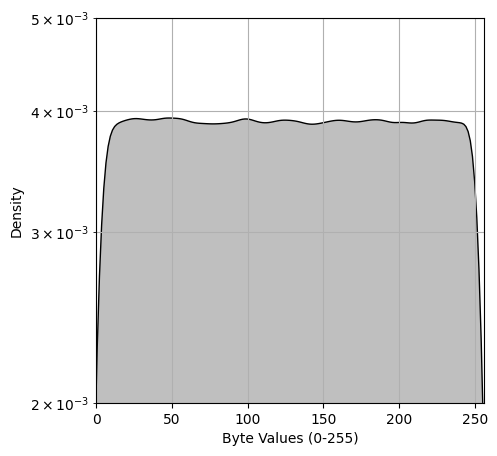

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

original_file_path = 'images/k_dataset/DJI_0006-h30.JPG'
encrypted_file_path = 'images/k_dataset/enc/DJI_0006-h30.JPG_PF.npy'

with open(original_file_path, 'rb') as file:
    original_file_data = file.read()

with open(encrypted_file_path, 'rb') as file:
    encrypted_file_data = file.read()

original_byte_values = np.frombuffer(original_file_data, dtype=np.uint8)
encrypted_byte_values = np.frombuffer(encrypted_file_data, dtype=np.uint8)


# sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

plt.xlabel('Byte Values (0-255)')
plt.ylabel('Density')

plt.xlim([0,256])
plt.ylim([0.002, 0.005])
plt.yscale('log')
plt.grid(True, which='both')

sns.kdeplot(original_byte_values, fill=True, color="black")

plt.savefig('plots/uniform_analysis_original.svg', format='svg')

plt.show()

plt.figure(figsize=(5, 5))

plt.xlabel('Byte Values (0-255)')
plt.ylabel('Density')

plt.xlim([0,256])
plt.ylim([0.002, 0.005])
plt.yscale('log')
plt.grid(True, which='both')

sns.kdeplot(encrypted_byte_values, fill=True, color="black")
plt.savefig('plots/uniform_analysis_encrypted.svg', format='svg')

plt.show()